DATA WRANGLING- HW 1- RAHUL RAJAGOPAL

1. Comparing the 2015 data with 2016 data:
a. Have the overall missing values in the EPA data increased or decreased between 2015
and 2016?
b. List the states for which the missing values in the data have increased and the states for
which the missing values in the data have decreased.
c. Create a new Pandas dataframe with the following columns, populate the dataframe,
and write it out as a CSV file:
 Year
 Month
 StateName
 CountyName
 Missing_Proportion: this is ratio of missing observations to the total
observations reported for the county in the corresponding month and year.

In [1]:
import pandas as pd
import numpy as np

a. Have the overall missing values in the EPA data increased or decreased between 2015
and 2016?

In [2]:
epa15 = pd.read_csv('EPA-data-2015.csv')
pd.options.display.max_columns=100

In [3]:
epa15_missing=epa15.isna().sum().sum()
epa15_missing

474626

In [4]:
epa16 = pd.read_csv('EPA-data-2016.csv')

In [5]:
epa16_missing=epa16.isna().sum().sum()
epa16_missing

383183

Missing values in 2015 = 474626.
Missing values in 2016 = 383183.
Missing values has decreased form 2015 to 2016.

b. List the states for which the missing values in the data have increased and the states for
which the missing values in the data have decreased.

In [8]:
epa15States=epa15.isnull().groupby(epa15['State Name']).sum().sum(axis=1)
epa16States=epa16.isnull().groupby(epa16['State Name']).sum().sum(axis=1)
epa15States-epa16States

State Name
Alabama                   267.0
Alaska                   3296.0
Arizona                  3893.0
Arkansas                  114.0
California              21381.0
Colorado                 -754.0
Connecticut             -1795.0
Country Of Mexico           NaN
Delaware                  622.0
District Of Columbia      380.0
Florida                  -622.0
Georgia                   482.0
Hawaii                   5615.0
Idaho                    2447.0
Illinois                  -59.0
Indiana                  4404.0
Iowa                       37.0
Kansas                   -855.0
Kentucky                 1722.0
Louisiana                  91.0
Maine                    1011.0
Maryland                 2503.0
Massachusetts            -851.0
Michigan                 1272.0
Minnesota                4432.0
Mississippi                 0.0
Missouri                 3803.0
Montana                  6603.0
Nebraska                  536.0
Nevada                   1750.0
New Hampshire             894

For States Colorado, Connecticut, Florida, Illinois, Kansas, Massachusetts, New Jersy, Ohio, South Carolina, Utah,Virginia, West Virginia missing values has increased from 2015 to 2016. 

c. Create a new Pandas dataframe with the following columns, populate the dataframe,
and write it out as a CSV file:
 Year
 Month
 StateName
 CountyName
 Missing_Proportion: this is ratio of missing observations to the total
observations reported for the county in the corresponding month and year.

In [9]:
frames=[epa15,epa16]
epaTotal=pd.concat(frames)
epaTotal.shape

(697215, 29)

In [10]:
epaTotalMissingCounty=epaTotal.isnull().groupby(epaTotal['County Name']).sum().sum(axis=1)
epaTotalCounty_nonmissing=epaTotal.groupby(epaTotal['County Name']).count().sum(axis=1)

In [11]:
def Missing_Proportion(County_Name):
    Missing_Proportion = epaTotalMissingCounty/epaTotalCounty_nonmissing
    return Missing_Proportion[County_Name]
                              
epaTotal["Missing_Proportion"]= epaTotal['County Name'].apply(lambda x:Missing_Proportion(x))

In [12]:
epaTotal["Date of Last Change"]=pd.to_datetime(epaTotal["Date of Last Change"])
epaTotal['Year'] = epaTotal['Date of Last Change'].apply(lambda x: x.year)
epaTotal['Month']= epaTotal['Date of Last Change'].apply(lambda x: x.month)

In [14]:
new_df= epaTotal[['County Name','State Name','Year','Month','Missing_Proportion']]
County_df_New = new_df.groupby(new_df['County Name']).first()
County_df_New.to_csv('MissingPropotion.csv', index = False, na_rep = '?')

In [15]:
County_df_New

,State Name,Year,Month,Missing_Proportion
County Name,,,,
Ada,Idaho,2016,6,0.000000
Adams,Colorado,2016,7,0.053177
Adjuntas,Puerto Rico,2016,1,0.000000
Alachua,Florida,2016,1,0.000000
Alamance,North Carolina,2015,7,0.000000
Alameda,California,2016,4,0.056739
Albany,New York,2016,4,0.000000
Albemarle,Virginia,2016,7,0.028676
Allegan,Michigan,2016,3,0.000000


2. Use “AQI” and “Arithmetic Mean” (of PM 2.5) as indicators of air quality to answer the following
questions:
a. On average, from 2015 to 2016 has pollution in the U.S. increased or decreased?
b. Insert a column in the 2015 and 2016 dataframes and call it “AQI category.” Populate
the values for AQI category as following:
AQI Category AQI value
Good 0-50
Moderate 51-100
Unhealthy-sensitive 101-150
Unhealthy 151-200
Very unhealthy 201-300
Hazardous >300
c. When AQI levels are in the 0-50 range, air quality is considered as “Good.” How many
days did Pittsburgh not meet the good air quality standard in 2015? How about in 2016?
d. Compare and comment on the air quality levels between Pittsburgh and Philadelphia.
e. In 2015 and 2016, on the days when Pittsburgh did not have good air quality, did
Philadelphia have good air quality?
f. If you rank order the U.S. cities featured in the datasets according to air quality, where
does Pittsburgh feature in 2015 and 2016? Provide the absolute rank and also the rank
in percentile terms.


a. On average, from 2015 to 2016 has pollution in the U.S. increased or decreased?

In [287]:
epa15AQIAvg= epa15['AQI'].mean()
epa15AQIAvg

33.347708478871866

In [82]:
epa15AMAvg= epa15['Arithmetic Mean'].mean()
epa15AMAvg

8.477091565613152

In [83]:
epa16AQIAvg= epa16['AQI'].mean()
epa16AQIAvg

29.921803937992987

In [84]:
epa16AMAvg= epa16['Arithmetic Mean'].mean()
epa16AMAvg

7.344183938932943

Mean AQI and Arithmetic Mean of year 2015 is higher than year 2016. Therefore pollution has decreased.

b. Insert a column in the 2015 and 2016 dataframes and call it “AQI category.” Populate
the values for AQI category as following:
AQI Category AQI value
Good 0-50
Moderate 51-100
Unhealthy-sensitive 101-150
Unhealthy 151-200
Very unhealthy 201-300
Hazardous >300

In [16]:
category = epa15['AQI']
bins = [0,50,100,150,200,300,9999999999]
bin_names = ['Good', 'Moderate', 'Unhealthy-Sensitive','Unhealthy','Very Unhealthy','Hazardous']
epa15['AQI category'] = pd.cut(category,bins,labels=bin_names)
epa15

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,AQI category
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,03-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,06-01-15,Micrograms/cubic meter (LC),None,1,100,11.5,11.5,0,48.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,09-01-15,Micrograms/cubic meter (LC),None,1,100,13.8,13.8,0,55.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Moderate
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,12-01-15,Micrograms/cubic meter (LC),None,1,100,9.8,9.8,0,41.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,15-01-15,Micrograms/cubic meter (LC),None,1,100,6.3,6.3,0,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,18-01-15,Micrograms/cubic meter (LC),None,1,100,7.0,7.0,0,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,21-01-15,Micrograms/cubic meter (LC),None,1,100,16.7,16.7,0,61.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Moderate
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,24-01-15,Micrograms/cubic meter (LC),None,1,100,6.6,6.6,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good
8,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,27-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good
9,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,30-01-15,Micrograms/cubic meter (LC),None,1,100,8.3,8.3,0,35.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good


In [73]:
category = epa16['AQI']
bins = [0,50,100,150,200,300,9999999999]
bin_names = ['Good', 'Moderate', 'Unhealthy-Sensitive','Unhealthy','Very Unhealthy','Hazardous']
epa16['AQI category'] = pd.cut(category,bins,labels=bin_names)
epa16

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,eventdummy,Region,AQI category
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,01-01-16,Micrograms/cubic meter (LC),None,1,100,7.9,7.9,0,33.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,04-01-16,Micrograms/cubic meter (LC),None,1,100,5.3,5.3,0,22.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,07-01-16,Micrograms/cubic meter (LC),None,1,100,6.7,6.7,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,10-01-16,Micrograms/cubic meter (LC),None,1,100,3.0,3.0,0,13.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,13-01-16,Micrograms/cubic meter (LC),None,1,100,8.7,8.7,0,36.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,16-01-16,Micrograms/cubic meter (LC),None,1,100,5.4,5.4,0,23.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,19-01-16,Micrograms/cubic meter (LC),None,1,100,6.2,6.2,0,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,22-01-16,Micrograms/cubic meter (LC),None,1,100,4.7,4.7,0,20.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
8,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,25-01-16,Micrograms/cubic meter (LC),None,1,100,7.5,7.5,0,31.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good
9,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,28-01-16,Micrograms/cubic meter (LC),None,1,100,6.6,6.6,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast,Good


c. When AQI levels are in the 0-50 range, air quality is considered as “Good.” How many
days did Pittsburgh not meet the good air quality standard in 2015? How about in 2016?

In [17]:
AQIPittsburgh15 = epa15[epa15['City Name'] == 'Pittsburgh'] 
AQIPittsburgh15_Bad = AQIPittsburgh15[AQIPittsburgh15['AQI']>50]
AQIPittsburgh15_Bad.shape[0]

103

In [18]:
AQIPittsburgh16 = epa16[epa16['City Name'] == 'Pittsburgh'] 
AQIPittsburgh16_Bad = AQIPittsburgh16[AQIPittsburgh16['AQI']>50]
AQIPittsburgh16_Bad.shape[0]

100

In 2015 Pittsburgh had 103 did not have 'Good' air quality and in 2016 100 days.

d. Compare and comment on the air quality levels between Pittsburgh and Philadelphia.

In [19]:
AQIPittsburgh15['AQI'].mean()

36.81012658227848

In [20]:
AQIPittsburgh16['AQI'].mean()

39.809815950920246

In [21]:
AQIPhiladelphia15 = epa15[epa15['City Name'] == 'Philadelphia'] 
AQIPhiladelphia15['AQI'].mean()

41.08077123501824

In [22]:
AQIPhiladelphia16 = epa16[epa16['City Name'] == 'Philadelphia'] 
AQIPhiladelphia16['AQI'].mean()

36.0

In year 2015: Pittsburgh had better air quality than Philadelphia(36.81<41.08)
In year 2016: Philadelphia had better air quality than Pittsburgh(39.809>36)

e. In 2015 and 2016, on the days when Pittsburgh did not have good air quality, did
Philadelphia have good air quality?

In [16]:
frames=[AQIPittsburgh15,AQIPhiladelphia15]
Pitt_Philly15=pd.concat(frames)
frames2=[AQIPittsburgh16,AQIPhiladelphia16]
Pitt_Philly16=pd.concat(frames2)
frames3=[Pitt_Philly15,Pitt_Philly16]
Pitt_Philly_15_16=pd.concat(frames3)

In [52]:
Pitt_Philly_15_16

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,Year,Month
298123,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,02-01-15,Micrograms/cubic meter (LC),None,1,100,10.5,10.5,0,44.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298124,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,03-01-15,Micrograms/cubic meter (LC),None,1,100,11.0,11.0,0,46.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298125,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,04-01-15,Micrograms/cubic meter (LC),None,1,100,4.2,4.2,0,18.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298126,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,05-01-15,Micrograms/cubic meter (LC),None,1,100,5.0,5.0,0,21.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298127,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,06-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298128,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,07-01-15,Micrograms/cubic meter (LC),None,1,100,5.8,5.8,0,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298129,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,08-01-15,Micrograms/cubic meter (LC),None,1,100,10.3,10.3,0,43.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298130,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,09-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298131,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,10-01-15,Micrograms/cubic meter (LC),None,1,100,8.2,8.2,0,34.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3
298132,42,3,8,88101,1,40.465420,-79.960757,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,11-01-15,Micrograms/cubic meter (LC),None,1,100,9.1,9.1,0,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2016-03-02,2016,3


f. If you rank order the U.S. cities featured in the datasets according to air quality, where
does Pittsburgh feature in 2015 and 2016? Provide the absolute rank and also the rank
in percentile terms.

In [110]:
pivotTableCounty15 = pd.pivot_table(epa15, values='AQI',
                            index=['City Name'], aggfunc = np.mean)
sortedAQI=pivotTableCounty15.sort_values(by=['AQI'])
sortedAQI['Rank']= sortedAQI['AQI'].rank(method='average')
sortedAQI['RankPercentile']= sortedAQI['AQI'].rank(method='average',pct='true')
sortedAQI.loc['Pittsburgh']

AQI                36.810127
Rank              480.000000
RankPercentile      0.727273
Name: Pittsburgh, dtype: float64

In [111]:
pivotTableCounty16 = pd.pivot_table(epa16, values='AQI',
                            index=['City Name'], aggfunc = np.mean)
sortedAQI=pivotTableCounty16.sort_values(by=['AQI'])
sortedAQI['Rank']= sortedAQI['AQI'].rank(method='average')
sortedAQI['RankPercentile']= sortedAQI['AQI'].rank(method='average',pct='true')
sortedAQI.loc['Pittsburgh']

AQI                39.809816
Rank              605.000000
RankPercentile      0.935085
Name: Pittsburgh, dtype: float64

Pittsburgh in 2015:
AQI                36.810127
Rank              480.000000
RankPercentile      0.727273

Pittsburgh in 2016:
AQI                39.809816
Rank              605.000000
RankPercentile      0.935085

3. Use the “Event Type” variable in the dataset to answer the following questions:
a. Create an indicator (or dummy) variable in the datasets and name it “eventdummy”;
eventdummy should be set to 0 if Event Type=”None”, else it should be set as 1.
b. Using the eventdummy variable, find out if at any given “Local Site” air quality is
impacted by the events that the site experiences. Group the states into commonly
known regions of the U.S. 1
, and see if there is variation in your finding across the
different regions.

a. Create an indicator (or dummy) variable in the datasets and name it “eventdummy”;
eventdummy should be set to 0 if Event Type=”None”, else it should be set as 1.

In [29]:
epa15['eventdummy'] = epa15.apply(lambda x : 0 if x["Event Type"]=="None" else 1,axis=1)
epa15

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,AQI category,eventdummy
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,03-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,06-01-15,Micrograms/cubic meter (LC),None,1,100,11.5,11.5,0,48.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,09-01-15,Micrograms/cubic meter (LC),None,1,100,13.8,13.8,0,55.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Moderate,0
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,12-01-15,Micrograms/cubic meter (LC),None,1,100,9.8,9.8,0,41.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,15-01-15,Micrograms/cubic meter (LC),None,1,100,6.3,6.3,0,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,18-01-15,Micrograms/cubic meter (LC),None,1,100,7.0,7.0,0,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,21-01-15,Micrograms/cubic meter (LC),None,1,100,16.7,16.7,0,61.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Moderate,0
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,24-01-15,Micrograms/cubic meter (LC),None,1,100,6.6,6.6,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0
8,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,27-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0
9,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,30-01-15,Micrograms/cubic meter (LC),None,1,100,8.3,8.3,0,35.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0


In [36]:
epa16['eventdummy'] = epa16.apply(lambda x : 0 if x["Event Type"]=="None" else 1,axis=1)
epa16

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,eventdummy
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,01-01-16,Micrograms/cubic meter (LC),None,1,100,7.9,7.9,0,33.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,04-01-16,Micrograms/cubic meter (LC),None,1,100,5.3,5.3,0,22.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,07-01-16,Micrograms/cubic meter (LC),None,1,100,6.7,6.7,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,10-01-16,Micrograms/cubic meter (LC),None,1,100,3.0,3.0,0,13.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,13-01-16,Micrograms/cubic meter (LC),None,1,100,8.7,8.7,0,36.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,16-01-16,Micrograms/cubic meter (LC),None,1,100,5.4,5.4,0,23.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,19-01-16,Micrograms/cubic meter (LC),None,1,100,6.2,6.2,0,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,22-01-16,Micrograms/cubic meter (LC),None,1,100,4.7,4.7,0,20.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
8,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,25-01-16,Micrograms/cubic meter (LC),None,1,100,7.5,7.5,0,31.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0
9,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,28-01-16,Micrograms/cubic meter (LC),None,1,100,6.6,6.6,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0


b. Using the eventdummy variable, find out if at any given “Local Site” air quality is
impacted by the events that the site experiences. Group the states into commonly
known regions of the U.S. 1
, and see if there is variation in your finding across the
different regions.

In [84]:
epa15LocalSite=epa15[[epa15['AQI category']!='Good'] and epa15['eventdummy']==1].groupby(epa15['Local Site Name'])
epa15LocalSiteSummary=epa15LocalSite.sum(axis=0)
epa15LocalSiteSummary['eventdummy']

Local Site Name
4102 Woolworth Ave. on Healthcenter Warehouse                4
Anacortes-202 Ave                                            2
Anderson- Eastside Elem. School                            712
Antelope Site 7 PM10 Monitor                                 2
Apple Valley                                                10
Auburn-Atwood                                               98
Azusa                                                        1
BABYLON                                                      1
BALLARD ROAD                                                25
BEULAH NORTH                                                17
BISMARCK RESIDENTIAL                                        13
BROADUS                                                     56
Battlement Mesa                                             79
Belle Ayr BA-4                                               2
Big Bear                                                     1
Birney - Tongue river                  

In [85]:
epa16LocalSite=epa16[[epa16['AQI category']!='Good'] and epa16['eventdummy']==1].groupby(epa16['Local Site Name'])
epa16LocalSiteSummary=epa16LocalSite.sum(axis=0)
epa16LocalSiteSummary['eventdummy']

Local Site Name
4102 Woolworth Ave. on Healthcenter Warehouse                               4
6ZM 2MI FROM MT CRISTO REY WHERE NM, TEX, AND MEXICO JOIN TOGETHER          2
Anderson- Eastside Elem. School                                           527
Auburn-Atwood                                                             288
BROADUS                                                                    42
Battlement Mesa                                                           224
Birney - Tongue river                                                      20
Bloomington- Binford Elementary School                                    601
Branch Street                                                             548
Butte Greeley School                                                       16
Candor: EPA CASTNet Site                                                  590
Carmel Valley                                                              22
Cortina Indian Rancheria                        

In [66]:
def regionMapper(state):
    regionMap = {'Maine':'Northeast', 'Massachusetts':'Northeast', 'Rhode Island':'Northeast', 'Connecticut':'Northeast', 'New Hampshire':'Northeast', 'Vermont':'Northeast', 'New York':'Northeast', 'Pennsylvania':'Northeast', 'New Jersey':'Northeast', 'Delaware':'Northeast', 'Maryland':'Northeast','West Virginia':'Southeast', 'Virginia':'Southeast', 'Kentucky':'Southeast', 'Tennessee':'Southeast', 'North Carolina':'Southeast', 'South Carolina':'Southeast', 'Georgia':'Southeast', 'Alabama':'Southeast', 'Mississippi':'Southeast', 'Arkansas':'Southeast', 'Louisiana':'Southeast', 'Florida':'Southeast','Ohio':'Midwest', 'Indiana':'Midwest', 'Michigan':'Midwest', 'Illinois':'Midwest', 'Missouri':'Midwest', 'Wisconsin':'Midwest', 'Minnesota':'Midwest', 'Iowa':'Midwest', 'Kansas':'Midwest', 'Nebraska':'Midwest', 'South Dakota':'Midwest', 'North Dakota':'Midwest','Texas':'Soutwest', 'Oklahoma':'Soutwest', 'New Mexico':'Soutwest', 'Arizona':'Soutwest','Colorado':'West', 'Wyoming':'West', 'Montana':'West', 'Idaho':'West', 'Washington':'West', 'Oregon':'West', 'Utah':'West', 'Nevada':'West', 'California':'West', 'Alaska':'West', 'Hawaii':'West','District Of Columbia':'Northeast','Puerto Rico':'Southeast','Virgin Islands':'Southeast','Country Of Mexico':'South'}
    return regionMap[state]

In [68]:
epa15['Region']= epa15['State Name'].apply(lambda x:regionMapper(x))
epa15

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,AQI category,eventdummy,Region
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,03-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0,Southeast
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,06-01-15,Micrograms/cubic meter (LC),None,1,100,11.5,11.5,0,48.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0,Southeast
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,09-01-15,Micrograms/cubic meter (LC),None,1,100,13.8,13.8,0,55.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Moderate,0,Southeast
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,12-01-15,Micrograms/cubic meter (LC),None,1,100,9.8,9.8,0,41.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0,Southeast
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,15-01-15,Micrograms/cubic meter (LC),None,1,100,6.3,6.3,0,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0,Southeast
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,18-01-15,Micrograms/cubic meter (LC),None,1,100,7.0,7.0,0,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0,Southeast
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,21-01-15,Micrograms/cubic meter (LC),None,1,100,16.7,16.7,0,61.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Moderate,0,Southeast
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,24-01-15,Micrograms/cubic meter (LC),None,1,100,6.6,6.6,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0,Southeast
8,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,27-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0,Southeast
9,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,30-01-15,Micrograms/cubic meter (LC),None,1,100,8.3,8.3,0,35.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",27-09-16,Good,0,Southeast


In [69]:
epa16['Region']= epa16['State Name'].apply(lambda x:regionMapper(x))
epa16

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,eventdummy,Region
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,01-01-16,Micrograms/cubic meter (LC),None,1,100,7.9,7.9,0,33.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,04-01-16,Micrograms/cubic meter (LC),None,1,100,5.3,5.3,0,22.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,07-01-16,Micrograms/cubic meter (LC),None,1,100,6.7,6.7,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,10-01-16,Micrograms/cubic meter (LC),None,1,100,3.0,3.0,0,13.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,13-01-16,Micrograms/cubic meter (LC),None,1,100,8.7,8.7,0,36.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,16-01-16,Micrograms/cubic meter (LC),None,1,100,5.4,5.4,0,23.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,19-01-16,Micrograms/cubic meter (LC),None,1,100,6.2,6.2,0,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,22-01-16,Micrograms/cubic meter (LC),None,1,100,4.7,4.7,0,20.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
8,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,25-01-16,Micrograms/cubic meter (LC),None,1,100,7.5,7.5,0,31.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast
9,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,28-01-16,Micrograms/cubic meter (LC),None,1,100,6.6,6.6,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",16-12-16,0,Southeast


In [86]:
epa15Region=epa15[[epa15['AQI category']!='Good'] and epa15['eventdummy']==1].groupby(epa15['Region'])
epa15RegionSummary=epa15Region.sum(axis=1)
epa15RegionSummary['eventdummy']

Region
Midwest      14954
Northeast     1652
Southeast     3286
Soutwest       321
West         11331
Name: eventdummy, dtype: int64

In [88]:
epa16Region=epa16[[epa16['AQI category']!='Good'] and epa16['eventdummy']==1].groupby(epa16['Region'])
epa16RegionSummary=epa16Region.sum(axis=1)
epa16RegionSummary['eventdummy']

Region
Midwest      12517
Northeast     1660
Southeast     2700
Soutwest       125
West          8407
Name: eventdummy, dtype: int64

4. Comment on the presence of outliers in the data. 

In [324]:
import seaborn as sns

In [437]:
frames=[epa15,epa16]
epaCombined=pd.concat(frames, sort=False)
epaCombined.shape

(697215, 30)

In [385]:
epaCombined.dtypes ##Outliers can be detected for float and int data types

1st Max Hour             int64
1st Max Value          float64
AQI                    float64
Address                 object
Arithmetic Mean        float64
CBSA Name               object
City Name               object
County Code              int64
County Name             object
Date Local              object
Date of Last Change     object
Datum                   object
Event Type              object
Latitude               float64
Local Site Name         object
Longitude              float64
Method Code            float64
Method Name             object
Observation Count        int64
Observation Percent      int64
POC                      int64
Parameter Code           int64
Parameter Name          object
Pollutant Standard      object
Sample Duration         object
Site Num                 int64
State Code               int64
State Name              object
Units of Measure        object
eventdummy             float64
dtype: object

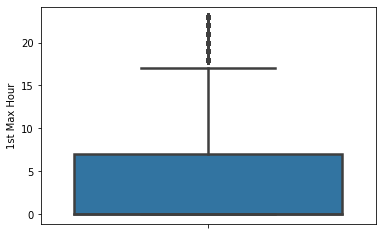

In [401]:
ax = sns.boxplot(x=epaCombined['1st Max Hour'], orient='v', linewidth=2.5) 

In [387]:
q1 = epaCombined['1st Max Hour'].quantile(0.25) # Q1
q3 = epaCombined['1st Max Hour'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['1st Max Hour'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)


Q1: 0.0 Q3: 7.0 Outlier Margin: 17.5
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (616456, 30)


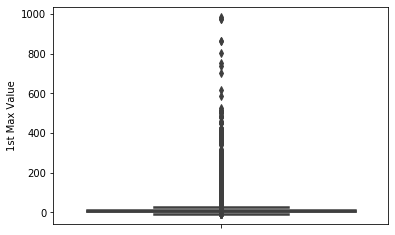

In [400]:
ax = sns.boxplot(x=epaCombined['1st Max Value'], orient='v', linewidth=2.5) 

In [402]:
q1 = epaCombined['1st Max Value'].quantile(0.25) # Q1
q3 = epaCombined['1st Max Value'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['1st Max Value'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 5.5 Q3: 14.1 Outlier Margin: 27.0
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (659109, 30)


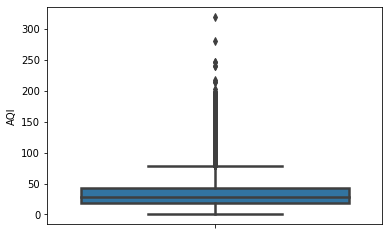

In [399]:
ax = sns.boxplot(x=epaCombined['AQI'], orient='v', linewidth=2.5) 

In [403]:
q1 = epaCombined['AQI'].quantile(0.25) # Q1
q3 = epaCombined['AQI'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['AQI'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 19.0 Q3: 43.0 Outlier Margin: 79.0
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (426518, 30)


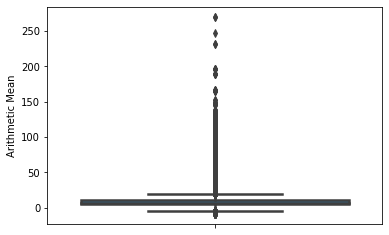

In [398]:
ax = sns.boxplot(x=epaCombined['Arithmetic Mean'], orient='v', linewidth=2.5) 

In [404]:
q1 = epaCombined['Arithmetic Mean'].quantile(0.25) # Q1
q3 = epaCombined['Arithmetic Mean'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['Arithmetic Mean'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 4.4 Q3: 10.2 Outlier Margin: 18.9
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (669901, 30)


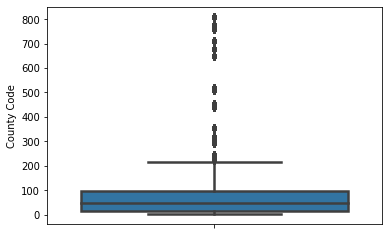

In [397]:
ax = sns.boxplot(x=epaCombined['County Code'], orient='v', linewidth=2.5) 

In [405]:
q1 = epaCombined['County Code'].quantile(0.25) # Q1
q3 = epaCombined['County Code'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['County Code'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 13.0 Q3: 95.0 Outlier Margin: 218.0
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (681701, 30)


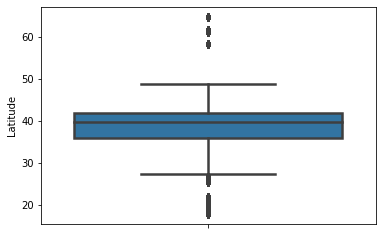

In [396]:
ax = sns.boxplot(x=epaCombined['Latitude'], orient='v', linewidth=2.5) 

In [406]:
q1 = epaCombined['Latitude'].quantile(0.25) # Q1
q3 = epaCombined['Latitude'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['Latitude'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 36.019186 Q3: 41.97677 Outlier Margin: 50.91314600000001
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (691200, 30)


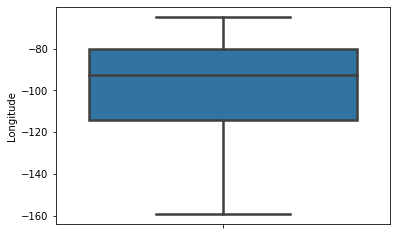

In [395]:
ax = sns.boxplot(x=epaCombined['Longitude'], orient='v', linewidth=2.5) 

In [407]:
q1 = epaCombined['Longitude'].quantile(0.25) # Q1
q3 = epaCombined['Longitude'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['Longitude'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: -114.189272 Q3: -80.420833 Outlier Margin: -29.7681745
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (697215, 30)


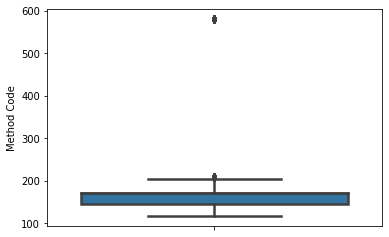

In [394]:
ax = sns.boxplot(x=epaCombined['Method Code'], orient='v', linewidth=2.5) 

In [408]:
q1 = epaCombined['Method Code'].quantile(0.25) # Q1
q3 = epaCombined['Method Code'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['Method Code'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 145.0 Q3: 170.0 Outlier Margin: 207.5
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (454363, 30)


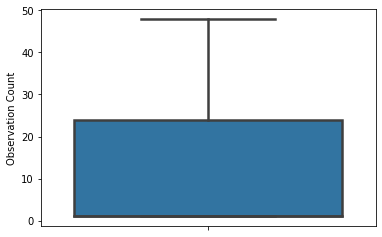

In [393]:
ax = sns.boxplot(x=epaCombined['Observation Count'], orient='v', linewidth=2.5) 

In [409]:
q1 = epaCombined['Observation Count'].quantile(0.25) # Q1
q3 = epaCombined['Observation Count'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['Observation Count'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 1.0 Q3: 24.0 Outlier Margin: 58.5
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (697215, 30)


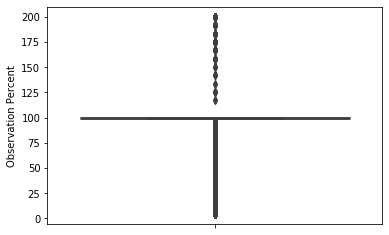

In [392]:
ax = sns.boxplot(x=epaCombined['Observation Percent'], orient='v', linewidth=2.5) 

In [410]:
q1 = epaCombined['Observation Percent'].quantile(0.25) # Q1
q3 = epaCombined['Observation Percent'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['Observation Percent'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 100.0 Q3: 100.0 Outlier Margin: 100.0
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (38555, 30)


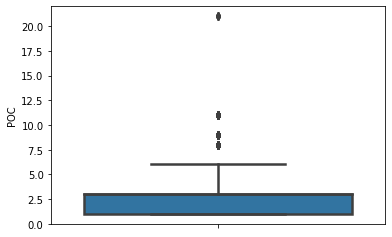

In [391]:
ax = sns.boxplot(x=epaCombined['POC'], orient='v', linewidth=2.5) 

In [411]:
q1 = epaCombined['POC'].quantile(0.25) # Q1
q3 = epaCombined['POC'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['POC'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 1.0 Q3: 3.0 Outlier Margin: 6.0
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (692981, 30)


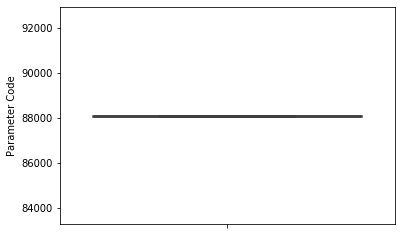

In [390]:
ax = sns.boxplot(x=epaCombined['Parameter Code'], orient='v', linewidth=2.5) 

In [412]:
q1 = epaCombined['Parameter Code'].quantile(0.25) # Q1
q3 = epaCombined['Parameter Code'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['Parameter Code'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 88101.0 Q3: 88101.0 Outlier Margin: 88101.0
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (0, 30)


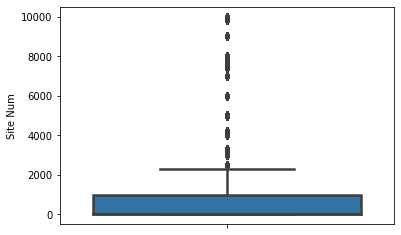

In [389]:
ax = sns.boxplot(x=epaCombined['Site Num'], orient='v', linewidth=2.5) 

In [413]:
q1 = epaCombined['Site Num'].quantile(0.25) # Q1
q3 = epaCombined['Site Num'].quantile(0.75) # Q3
outlier_margin = q3+((q3-q1)*1.5) # Q3-Q1 is the IQR. Data points outside 1.5 IQR are considered to be outliers

print('Q1:', q1, 'Q3:', q3, 'Outlier Margin:', outlier_margin)
outliersRemoved=epaCombined[epaCombined['Site Num'] < outlier_margin]

print('Original DataFrame Size:', epaCombined.shape)
print('DataFrame Size after Outliers Removed:', outliersRemoved.shape)

Q1: 7.0 Q3: 1002.0 Outlier Margin: 2494.5
Original DataFrame Size: (697215, 30)
DataFrame Size after Outliers Removed: (643101, 30)


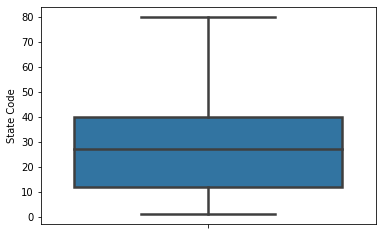

In [388]:
ax = sns.boxplot(x=epaCombined['State Code'], orient='v', linewidth=2.5) 

Alternate method to filter Outliers:

In [419]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(epaCombined)
final_df

capping the  1st Max Hour
capping the  1st Max Value


C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


capping the  AQI
capping the  Address
capping the  Arithmetic Mean
capping the  CBSA Name
capping the  City Name
capping the  County Code
capping the  County Name
capping the  Date Local
capping the  Date of Last Change
capping the  Datum
capping the  Event Type
capping the  Latitude
capping the  Local Site Name
capping the 

C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


 Longitude
capping the  Method Code
capping the  Method Name
capping the  Observation Count
capping the  Observation Percent


C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


capping the  POC
capping the  Parameter Code


C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


capping the  Parameter Name
capping the  Pollutant Standard
capping the  Sample Duration
capping the  Site Num
capping the  State Code
capping the  State Name
capping the  Units of Measure
capping the  eventdummy


C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,1st Max Hour,1st Max Value,AQI,Address,Arithmetic Mean,CBSA Name,City Name,County Code,County Name,Date Local,Date of Last Change,Datum,Event Type,Latitude,Local Site Name,Longitude,Method Code,Method Name,Observation Count,Observation Percent,POC,Parameter Code,Parameter Name,Pollutant Standard,Sample Duration,Site Num,State Code,State Name,Units of Measure,eventdummy
0,0,6.8,28.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",6.8,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,03-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
1,0,11.5,43.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",10.2,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,06-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
2,0,13.8,43.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",10.2,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,09-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
3,0,9.8,41.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",9.8,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,12-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
4,0,6.3,26.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",6.3,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,15-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
5,0,7.0,29.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",7.0,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,18-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
6,0,14.1,43.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",10.2,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,21-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
7,0,6.6,28.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",6.6,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,24-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
8,0,6.8,28.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",6.8,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,27-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN
9,0,8.3,35.0,"FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",8.3,"Daphne-Fairhope-Foley, AL",Fairhope,13,Baldwin,30-01-15,27-09-16,NAD83,None,36.019186,"FAIRHOPE, Alabama",-87.880258,145.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,1,100,1,88101,PM2.5 - Local Conditions,PM25 24-hour 2006,24 HOUR,10,12,Alabama,Micrograms/cubic meter (LC),NaN


5. Combine the two datasets and then create the following:
a. A new variable that is a combination of “State Code” and “County Name”; call it “statecounty.”
b. Create a pivot table with “state-county,” “month” and “year” as the indices. The values
of AQI must be averaged in the pivot table. Then, query the pivot table you created for
the values of cities with the phrase “New” in them (New York, Newport, etc.).

In [436]:
frames=[epa15,epa16]
epaCombine=pd.concat(frames, sort=False)
epaCombine.shape

(697215, 30)

a. A new variable that is a combination of “State Code” and “County Name”; call it “statecounty.”

In [448]:
epaCombine['statecounty']= epaCombine['State Code'].map(str) + epaCombine['County Name']
epaCombine

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,eventdummy,Year,Month,statecounty
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,03-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,06-01-15,Micrograms/cubic meter (LC),None,1,100,11.5,11.5,0,48.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,09-01-15,Micrograms/cubic meter (LC),None,1,100,13.8,13.8,0,55.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,12-01-15,Micrograms/cubic meter (LC),None,1,100,9.8,9.8,0,41.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,15-01-15,Micrograms/cubic meter (LC),None,1,100,6.3,6.3,0,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,18-01-15,Micrograms/cubic meter (LC),None,1,100,7.0,7.0,0,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,21-01-15,Micrograms/cubic meter (LC),None,1,100,16.7,16.7,0,61.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,24-01-15,Micrograms/cubic meter (LC),None,1,100,6.6,6.6,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
8,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,27-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
9,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,30-01-15,Micrograms/cubic meter (LC),None,1,100,8.3,8.3,0,35.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwi

b. Create a pivot table with “state-county,” “month” and “year” as the indices. The values
of AQI must be averaged in the pivot table. Then, query the pivot table you created for
the values of cities with the phrase “New” in them (New York, Newport, etc.).

In [444]:
epaCombine["Date of Last Change"]=pd.to_datetime(epaCombine["Date of Last Change"])
epaCombine['Year'] = epaCombine['Date of Last Change'].apply(lambda x: x.year)
epaCombine['Month']= epaCombine['Date of Last Change'].apply(lambda x: x.month)

In [459]:
epaCombine

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,eventdummy,Year,Month,statecounty
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,03-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,06-01-15,Micrograms/cubic meter (LC),None,1,100,11.5,11.5,0,48.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,09-01-15,Micrograms/cubic meter (LC),None,1,100,13.8,13.8,0,55.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,12-01-15,Micrograms/cubic meter (LC),None,1,100,9.8,9.8,0,41.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,15-01-15,Micrograms/cubic meter (LC),None,1,100,6.3,6.3,0,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,18-01-15,Micrograms/cubic meter (LC),None,1,100,7.0,7.0,0,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,21-01-15,Micrograms/cubic meter (LC),None,1,100,16.7,16.7,0,61.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,24-01-15,Micrograms/cubic meter (LC),None,1,100,6.6,6.6,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
8,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,27-01-15,Micrograms/cubic meter (LC),None,1,100,6.8,6.8,0,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwin
9,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2006,30-01-15,Micrograms/cubic meter (LC),None,1,100,8.3,8.3,0,35.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2016-09-27,NaN,2016,9,1Baldwi

In [463]:
pivotTable = pd.pivot_table(epaCombine, values='AQI',
                            index=['statecounty','Month','Year'], aggfunc = np.mean)
pivotTable

AQI
statecounty            Month Year           
10Kent                 1     2016  31.863636
                       5     2016  31.308383
                       10    2016  32.226891
                       12    2016  28.083721
10New Castle           1     2016  36.866393
                       5     2016  35.774319
                       12    2016  33.083070
10Sussex               1     2016  34.725762
                       12    2016  28.171975
11District of Columbia 1     2016  36.704655
                       9     2016  36.806452
                       10    2016  34.370370
                       12    2016  39.320513
12Alachua              1     2016  23.840708
                       3     2016  24.928571
                       11    2016  25.305556
12Brevard              1     2016  21.841667
                       11    2016  21.168539
12Broward              4     2016  26.474729
                       11    2016  26.903455
12Citrus               5     2016  22.542857
                       11    2016  23.944444
12Duval                7     2016  30.827778
                       8     2016  37.979592
                       10    2016  30.125503
12Escambia             1     2016  30.822695
                       11    2016  28.990099
12Hillsborough         4     2016  32.228669
                       8     2016  38.183879
                       11    2016  31.755767
...                                      ...
8Larimer               3     2016  24.760331
                       8     2016  25.830508
8Mesa                  1     2016  27.260274
                       3     2016  23.117647
                       6     2016  23.695652
                       8     2016  23.711921
8Montezuma             4     2016  19.461538
8Park                  5     2016  11.688222
8Pueblo                3     2016  20.808333
                       11    2016  19.875000
8Rio Blanco            11    2016  33.350725
                       12    2016  32.580071
8Weld                  3     2016  29.463768
                       8     2016  34.107477
                       11    2016  27.913043
9Fairfield             3     2016  35.189573
                       7     2016  31.732759
                       9     2016  37.507886
                       12    2016  32.817420
9Hartford              3     2016  31.280000
                       9     2016  34.645533
                       12    2016  25.917665
9Litchfield            3     2016  21.890756
                       12    2016  20.830409
9New Haven             3     2016  32.445217
                       9     2016  36.776163
                       12    2016  27.165517
9New London            3     2016  29.763636
                       9     2016  25.665706
                       12    2016  21.892977

[1696 rows x 1 columns]